In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotib.pyplot


In [ ]:
!pip install openpyxl

In [ ]:
!pip install wordcloud
!pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

In [6]:
# Soal 1
df = pd.read_csv('/diabetes.csv')
# Mendefinisikan variabel diabetes dengan data csv diabetes

In [7]:
df.head()
# Mencar data pada bari atas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


In [8]:
df.info()
# menampilkan informasi tentang data diabetes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [9]:
# Imputasi mean
numerical = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical] = df[numerical].fillna(df[numerical].mean())

In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
# Imputasi dengan median
df[numerical] = df[numerical].fillna(df[numerical].median())

In [12]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
df=df.fillna(df.mode().iloc[0])

In [14]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

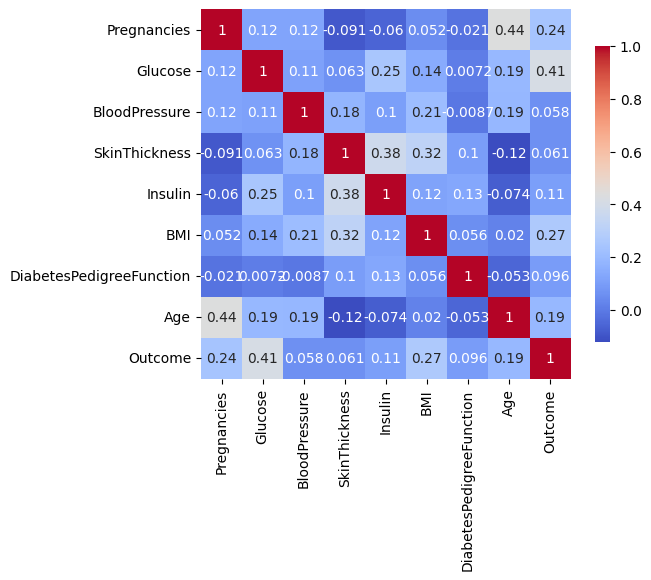

In [18]:
# Soal 2
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",
            square=True, cbar_kws={"shrink": .8})

In [24]:
# Soal 3
# melakukan imbalance handling dengan undersampling
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('Outcome', axis=1)
y = df['Outcome']

sampler = RandomUnderSampler(random_state=42)

X_resample, y_resample = sampler.fit_resample(X, y)

In [25]:
X_resample, y_resample.head()

(     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 556     1.000000   97.000000           70.0           40.0   76.878472   
 117     5.000000  120.462481           48.0            0.0    0.000000   
 572     3.000000  111.000000           58.0           31.0   44.000000   
 251     2.000000  129.000000           84.0            0.0    0.000000   
 161     7.000000  102.000000           74.0           40.0   76.878472   
 ..           ...         ...            ...            ...         ...   
 755     1.000000  128.000000           88.0           39.0  110.000000   
 757     3.803184  123.000000           72.0            0.0   76.878472   
 759     6.000000  190.000000           92.0            0.0    0.000000   
 761     9.000000  120.462481           74.0           31.0   76.878472   
 766     1.000000  126.000000           60.0            0.0    0.000000   
 
           BMI  DiabetesPedigreeFunction        Age  
 556  31.99368                218.000000  30

In [16]:
# Soal 4
from sklearn.datasets import make_classification
from sklearn.preprocessing import RobustScaler, MinMaxScaler
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)

In [26]:
# Menampilkan data pertama yang telah dilakukan scaling dengan robust scaler dan minmax
df_robust_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.549204,0.000000,0.233901,0.40625,-0.831119,0.000000,0.951679,0.000000,1.0
1,-0.700796,-1.099612,-0.227637,0.21875,-0.831119,0.000000,0.047502,-0.180510,0.0
2,1.049204,1.939148,-0.381483,-0.68750,-0.831119,-1.879715,1.099099,-0.097177,1.0
3,-0.700796,-0.975581,-0.227637,0.03125,0.185098,-0.841877,-0.555283,-1.013844,0.0
4,-0.950796,0.000000,-2.227637,0.40625,0.985098,2.401366,0.052480,-0.013844,1.0
